In [1]:
# Version of Julia used 1.2
# The package explored is Clutering.jl - which offers clustering based on various clustering algorithms eg. K-means, 
# DBSCAN, K-medoids, etc. The accompanying packages used for dataset is RDatasets.jl and Plots.jl
import Pkg
Pkg.add("Clustering")
Pkg.add("RDatasets")
Pkg.add("Plots")
using Clustering
using RDatasets
using Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.624678e+00
      1       2.189473e+00      -2.435205e+00 |       10
      2       1.919658e+00      -2.698151e-01 |        5
      3       1.856777e+00      -6.288083e-02 |        8
      4       1.783205e+00      -7.357252e-02 |        6
      5       1.655160e+00      -1.280442e-01 |        5
      6       1.611082e+00      -4.407847e-02 |        5
      7       1.529917e+00      -8.116525e-02 |        2
      8       1.479714e+00      -5.020284e-02 |        2
      9       1.445339e+00      -3.437475e-02 |        2
     10       1.436642e+00      -8.697078e-03 |        0
     11       1.436642e+00       0.000000e+00 |        0
K-means converged with 11 iterations (objv = 1.4366420862751066)


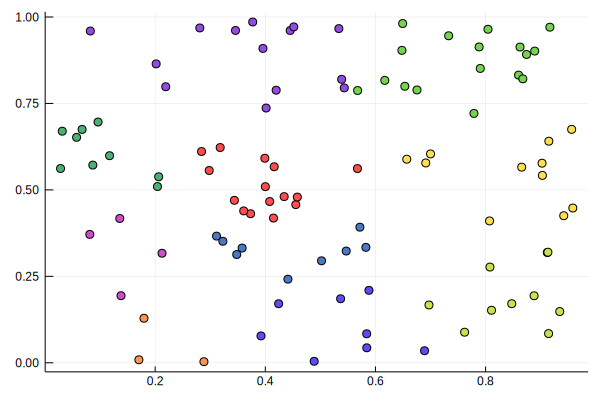

In [2]:
# Example 1: K-means on 2-dimensional data

# make a random dataset with num_points random 2-dimensional points
num_points = 100
num_clusters = 10
X = rand(2, num_points)

# cluster X into num_clusters clusters using K-means
# set maxiter to set the maximum number of iterations
# set display=:iter to show the progress of the iteration
R = kmeans(X, num_clusters; maxiter=200, display=:iter) 

@assert nclusters(R) == num_clusters # verify the number of clusters

a = assignments(R) # get the assignments of points to clusters
c = counts(R) # get the cluster sizes
M = R.centers # get the cluster centers

# plot with the point color mapped to the assigned cluster index
scatter(X[1,:], X[2, :], marker_z = a,
        color=:lightrainbow, legend = false)

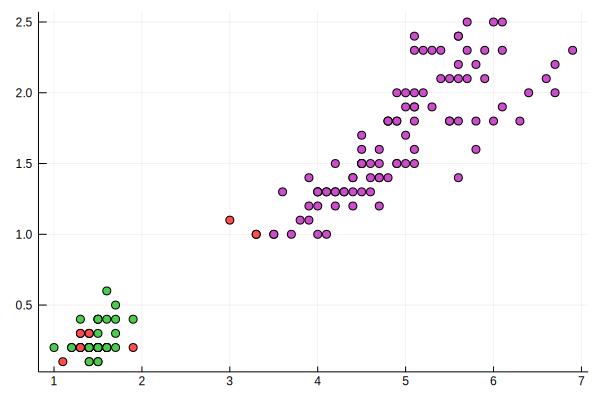

In [3]:
# Example 2: K-means on iris dataset
iris = dataset("datasets", "iris"); # load the data

features = collect(Matrix(iris[:, 1:4])'); # features to use for clustering
result = kmeans(features, 3); # run K-means for the 3 clusters

# plot with the point color mapped to the assigned cluster index
scatter(iris.PetalLength, iris.PetalWidth, marker_z = result.assignments,
        color=:lightrainbow, legend=false)

  Iters      center-change
----------------------------
      1       5.878944e-01
      2       4.285944e-02
      3       4.717341e-02
      4       6.898211e-02
      5       6.548804e-02
      6       2.826563e-02
      7       1.064739e-02
      8       6.271763e-03
      9       4.028069e-03
     10       2.803222e-03
     11       2.095002e-03
     12       1.655699e-03
     13       1.362502e-03
     14       1.197728e-03
     15       1.090169e-03
     16       9.889883e-04
Fuzzy C-means converged with 16 iterations (δ = 0.0009889883137211698)
M = [0.27719976398111634 0.3549589757037564 0.6516587022348213; 0.5561835140796818 0.1744199289252057 0.37483011675443606]


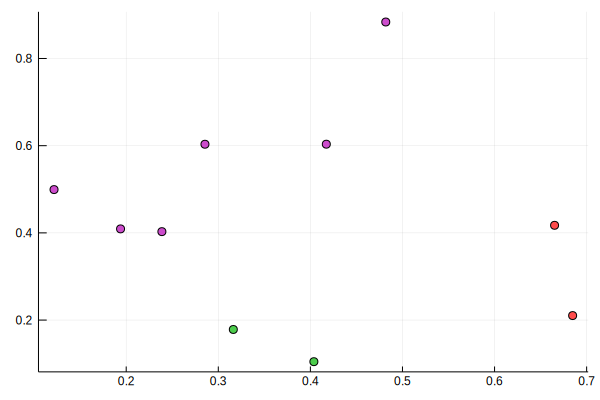

In [28]:
# Example 3: Fuzzy C-means
# make a random dataset with num_points
# each point is a 2-dimensional vector
num_points = 10
X = rand(2, num_points)

num_clusters = 3
# performs Fuzzy C-means over X, trying to group them into 3 clusters
# with a fuzziness factor of 2
R = fuzzy_cmeans(X, num_clusters, 2, maxiter=200, display=:iter)

# get the centers (i.e. weighted mean vectors)
# M is a 2 x num_clusters matrix
# M[:, k] is the center of the k-th cluster
M = R.centers
@show M

# get the point memberships over all the clusters
# memberships is a num_points x num_clusters matrix
memberships = R.weights

# get the assignment
vals, inds = findmax(memberships, dims = 2)
assign = []
for c in 1:length(inds)
    push!(assign, inds[c][2])
end
assign2 = Array{Int64, 1}(assign)

# plot with the point color mapped to the assigned cluster index
scatter(X[1,:], X[2, :], marker_z = assign2,
        color=:lightrainbow, legend = false)